In [1]:
# !pip install cdt networkx matplotlib pandas scikit-learn

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7410 sha256=1a118f30d8c91fba2f2f880bbc33abfc488ff721d5af07029987298bcb8dd2b8
  Stored in directory: c:\users\1412r\appdata\local\pip\cache\wheels\ba\03\bb\7a97840eb54479b328672e15a536e49dc60da200fb21564d53
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29256 sha256=f6f16a95a03fe0f1c804440dd4da266cb9b9f8e9615a5632c34f3526dbceac72
  Stored in directory: c:\users\1412r\appdata\local\pip\cache\wheels\1e\93\22\f83048fc1dafedcec44bb4ccf8d08225da96d20115d97a7a77
Successfully built GPUtil skrebate


In [1]:
import pandas as pd
from io import StringIO
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Copy paste data from excel here, without the headers

In [2]:
# Copy paste data from excel here, without the headers
raw = """
01-08-2024	0	0	0	0
02-08-2024	0	1	1	0
03-08-2024	0	0	1	0
04-08-2024	0	1	0	0
05-08-2024	0	0	0	1
06-08-2024	0	0	0	1
07-08-2024	0	1	0	0
08-08-2024	0	0	0	0
09-08-2024	0	0	1	1
10-08-2024	0	0	1	0
11-08-2024	0	0	0	0
12-08-2024	0	0	0	1
13-08-2024	0	1	0	0
14-08-2024	0	0	0	1
15-08-2024	0	0	0	0
16-08-2024	0	1	1	1
17-08-2024	0	1	1	0
18-08-2024	0	1	0	0
19-08-2024	0	0	0	0
20-08-2024	0	0	0	0
21-08-2024	0	0	0	1
22-08-2024	1	1	0	1
23-08-2024	1	1	1	0
24-08-2024	1	1	1	0
25-08-2024	1	0	0	0
26-08-2024	1	0	0	0
27-08-2024	0	0	0	0
28-08-2024	0	0	0	0
29-08-2024	0	0	0	0
30-08-2024	0	0	1	1
31-08-2024	0	1	1	0
01-09-2024	0	0	0	1
02-09-2024	0	0	0	0
03-09-2024	0	0	0	0
04-09-2024	0	0	0	0
05-09-2024	0	0	0	0
06-09-2024	0	1	1	0
07-09-2024	0	0	1	0
08-09-2024	0	0	0	0
09-09-2024	0	0	0	1
10-09-2024	0	0	0	1
11-09-2024	0	0	0	1
12-09-2024	0	0	0	0
13-09-2024	0	1	1	0
14-09-2024	0	0	1	0
15-09-2024	0	1	0	0
16-09-2024	0	0	0	1
17-09-2024	0	0	0	0
18-09-2024	0	0	0	1
19-09-2024	0	0	0	0
20-09-2024	1	1	1	1
21-09-2024	1	1	1	1
22-09-2024	1	0	0	1
23-09-2024	1	0	0	0
24-09-2024	1	1	0	0
25-09-2024	0	0	0	0
26-09-2024	0	0	0	0
27-09-2024	0	0	1	0
28-09-2024	0	0	1	0
29-09-2024	0	1	0	0
30-09-2024	0	0	0	0
01-10-2024	0	0	0	1
02-10-2024	0	0	0	0
03-10-2024	0	1	0	0
04-10-2024	0	0	1	0
05-10-2024	0	0	1	0
06-10-2024	0	0	0	0
07-10-2024	0	0	0	0
08-10-2024	0	0	0	0
09-10-2024	0	0	0	0
10-10-2024	0	0	0	0
11-10-2024	0	1	1	0
12-10-2024	0	0	1	0
13-10-2024	0	1	0	0
14-10-2024	0	0	0	1
15-10-2024	0	0	0	0
16-10-2024	0	0	0	0
17-10-2024	0	0	0	1
18-10-2024	1	0	1	0
19-10-2024	1	1	1	0
20-10-2024	1	0	0	0
21-10-2024	1	0	0	0
22-10-2024	1	0	0	0
23-10-2024	0	0	0	0
24-10-2024	0	0	0	0
25-10-2024	0	1	1	0
26-10-2024	0	1	1	0
27-10-2024	0	1	0	0
28-10-2024	0	0	0	0
29-10-2024	0	0	0	0
30-10-2024	0	0	0	0
31-10-2024	0	0	0	0
01-11-2024	0	1	1	0
02-11-2024	0	0	1	0
03-11-2024	0	0	0	0
04-11-2024	0	0	0	1
05-11-2024	0	0	0	0
06-11-2024	0	0	0	0
07-11-2024	0	0	0	0
08-11-2024	0	0	1	0
09-11-2024	0	1	1	0
10-11-2024	0	1	0	0
11-11-2024	0	0	0	0
12-11-2024	0	0	0	1
13-11-2024	0	0	0	0
14-11-2024	0	0	0	1
15-11-2024	0	1	1	1
16-11-2024	1	1	1	1
17-11-2024	1	0	0	0
18-11-2024	1	0	0	0
19-11-2024	1	0	0	0
20-11-2024	1	0	0	0
21-11-2024	0	0	0	0
22-11-2024	0	1	1	0
23-11-2024	0	1	1	0
24-11-2024	0	1	0	0
25-11-2024	0	0	0	0
26-11-2024	0	1	0	0
27-11-2024	0	0	0	0
28-11-2024	0	0	0	0
29-11-2024	0	0	1	1
30-11-2024	0	0	1	1
01-12-2024	0	1	0	0
02-12-2024	0	0	0	0
03-12-2024	0	0	0	0
04-12-2024	0	0	0	0
05-12-2024	0	0	0	0
06-12-2024	0	0	1	1
07-12-2024	0	1	1	0
08-12-2024	0	0	0	0
09-12-2024	0	0	0	0
10-12-2024	0	0	0	0
11-12-2024	0	0	0	1
12-12-2024	0	0	0	1
13-12-2024	0	0	1	0
14-12-2024	1	0	1	1
15-12-2024	1	1	0	0
16-12-2024	1	0	0	0
17-12-2024	1	1	0	0
18-12-2024	1	0	0	1
19-12-2024	0	0	0	0
20-12-2024	0	1	1	0
21-12-2024	0	1	1	0
22-12-2024	0	1	0	0
23-12-2024	0	0	0	1
24-12-2024	0	0	0	0
25-12-2024	0	0	0	1
26-12-2024	0	1	0	0
27-12-2024	0	0	1	1
28-12-2024	0	0	1	0
29-12-2024	0	1	0	1
30-12-2024	0	0	0	0
31-12-2024	0	0	0	0
01-01-2025	0	0	0	0
02-01-2025	0	0	0	1
03-01-2025	0	0	1	0
04-01-2025	0	1	1	0
05-01-2025	0	1	0	0
06-01-2025	0	0	0	1
07-01-2025	0	0	0	0
08-01-2025	0	0	0	1
09-01-2025	0	0	0	0
10-01-2025	1	1	1	0
11-01-2025	1	0	1	0
12-01-2025	1	1	0	1
13-01-2025	1	0	0	0
14-01-2025	1	0	0	0
15-01-2025	0	0	0	0
16-01-2025	0	0	0	0
17-01-2025	0	0	1	0
18-01-2025	0	0	1	0
19-01-2025	0	0	0	0
20-01-2025	0	0	0	1
21-01-2025	0	0	0	0
22-01-2025	0	0	0	0
23-01-2025	0	0	0	0
24-01-2025	0	0	1	0
25-01-2025	0	1	1	0
26-01-2025	0	0	0	0
27-01-2025	0	0	0	1
28-01-2025	0	0	0	0
29-01-2025	0	0	0	0
30-01-2025	0	0	0	0
31-01-2025	0	0	1	0
01-02-2025	0	0	1	0
02-02-2025	0	0	0	0
03-02-2025	0	0	0	0
04-02-2025	0	0	0	1
05-02-2025	0	0	0	1
06-02-2025	0	0	0	1
07-02-2025	0	0	1	1
08-02-2025	0	1	1	1
09-02-2025	0	0	0	0
10-02-2025	0	0	0	0
11-02-2025	0	0	0	1
12-02-2025	0	0	0	0
13-02-2025	0	0	0	0
14-02-2025	1	0	1	0
15-02-2025	1	1	1	1
16-02-2025	1	0	0	0
17-02-2025	1	0	0	0
18-02-2025	1	0	0	0
19-02-2025	0	0	0	0
20-02-2025	0	0	0	0
21-02-2025	0	0	1	0
22-02-2025	0	1	1	0
23-02-2025	0	0	0	0
24-02-2025	0	0	0	0
25-02-2025	0	0	0	0
26-02-2025	0	0	0	0
27-02-2025	0	0	0	1
28-02-2025	0	0	1	0
01-03-2025	0	1	1	0
02-03-2025	0	0	0	0
03-03-2025	0	0	0	0
04-03-2025	0	0	0	1
05-03-2025	0	0	0	0
06-03-2025	0	0	0	0
07-03-2025	0	0	1	1
08-03-2025	0	1	1	1
09-03-2025	0	1	0	1
10-03-2025	0	0	0	0
11-03-2025	0	0	0	0
12-03-2025	0	0	0	0
13-03-2025	0	1	0	1
14-03-2025	0	0	1	1
15-03-2025	1	1	1	1
16-03-2025	1	0	0	1
17-03-2025	1	0	0	0
18-03-2025	1	0	0	0
19-03-2025	1	0	0	0
20-03-2025	0	0	0	0
21-03-2025	0	0	1	0
22-03-2025	0	1	1	0
23-03-2025	0	0	0	0
24-03-2025	0	0	0	1
25-03-2025	0	0	0	0
26-03-2025	0	0	0	0
27-03-2025	0	0	0	0
"""

In [3]:
df = pd.read_csv(StringIO(raw), sep="\t", header=None, names=["date", "ov_window", "ex_dummy", "is_weekend", "ast_dummy"])

In [4]:
print(df['ov_window'].value_counts(normalize=True))
print(df['ex_dummy'].value_counts())
print(df['is_weekend'].value_counts(normalize=True))
print(df['ast_dummy'].value_counts())

0    0.832636
1    0.167364
Name: ov_window, dtype: float64
0    182
1     57
Name: ex_dummy, dtype: int64
0    0.715481
1    0.284519
Name: is_weekend, dtype: float64
0    179
1     60
Name: ast_dummy, dtype: int64


All the categorical variables are leaning towards being unbalanced. This can cause unreliable statistical test results.
When a category is underrepresented, it can cause problems like:

Biased Estimates: The model might incorrectly associate relationships with the larger category (e.g., period_dummy == 0) because it has much more data to learn from.

Overfitting or Underfitting: The model may overfit to the majority class or struggle to make predictions for the minority class due to insufficient examples.

Statistical Power: Statistical tests might fail to detect meaningful relationships for the underrepresented category due to the lower power of the tests.

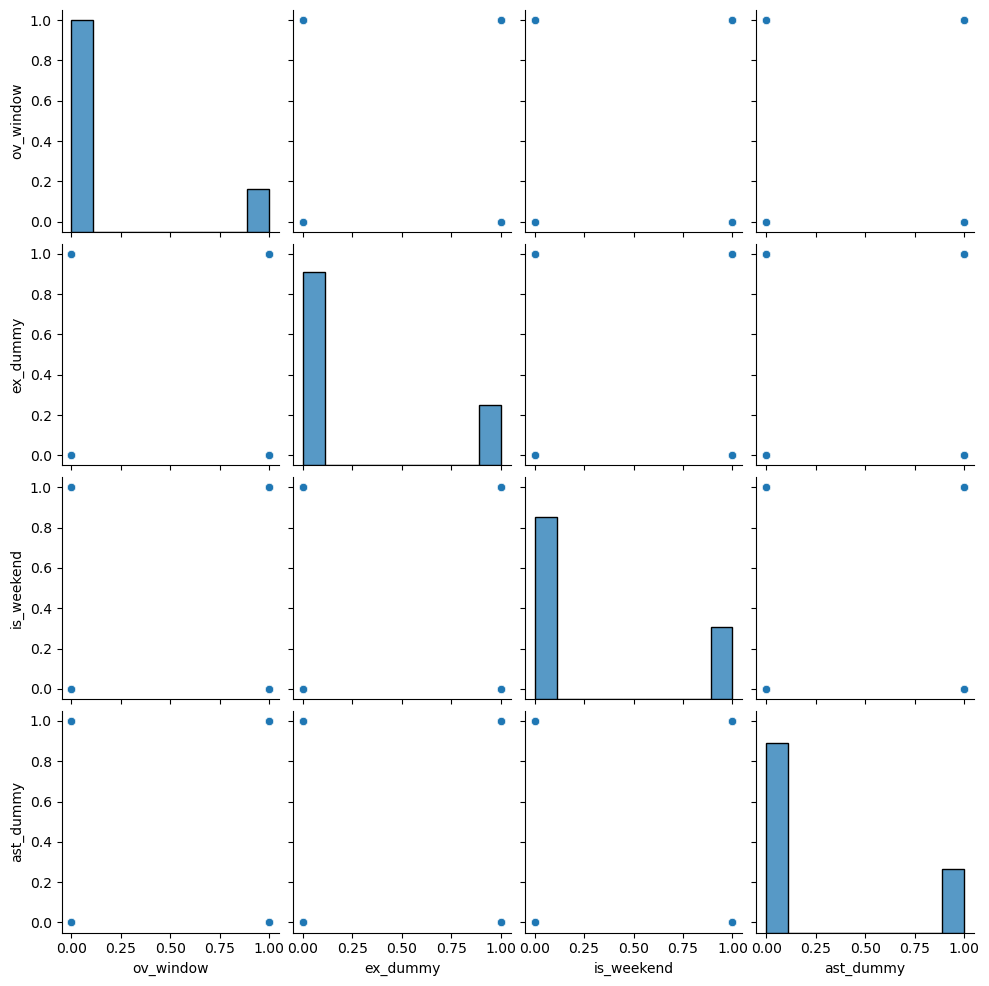

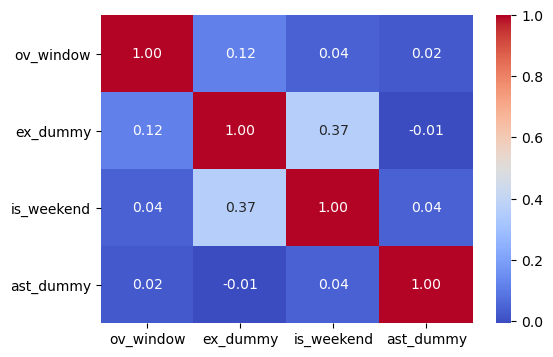

In [5]:
# Pairplot to see relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap (not causality, just a check)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


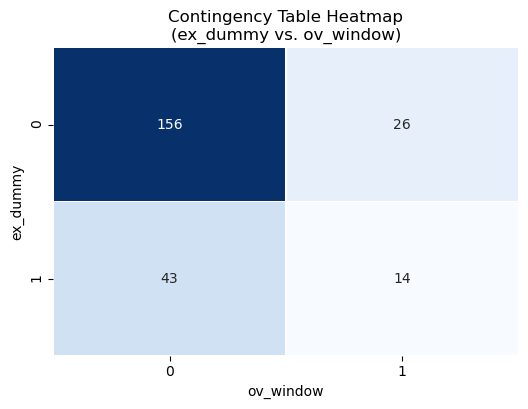

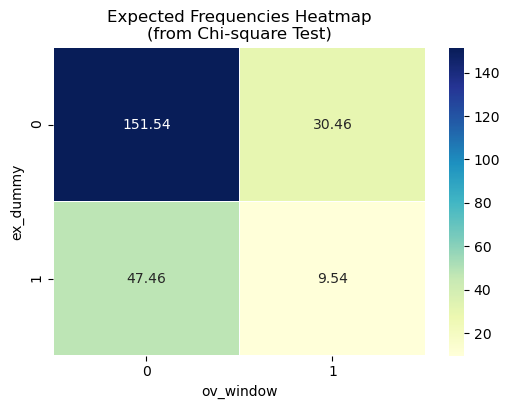

Chi-square p-value: 0.10734603663634623
Chi-square statistic: 2.5928645268709074


In [6]:
# Create a contingency table ex_dummy vs ov_window
contingency_table = pd.crosstab(df["ex_dummy"], df["ov_window"])

# Plotting the heatmap of the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False, linewidths=0.5)
plt.title("Contingency Table Heatmap\n(ex_dummy vs. ov_window)")
plt.xlabel("ov_window")
plt.ylabel("ex_dummy")
plt.show()

# Perform Chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Plotting the heatmap for expected frequencies (from Chi-square test)
plt.figure(figsize=(6, 4))
sns.heatmap(expected, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Expected Frequencies Heatmap\n(from Chi-square Test)")
plt.xlabel("ov_window")
plt.ylabel("ex_dummy")
plt.show()

# Printing the p-value for the Chi-square test
print(f"Chi-square p-value: {p}")
print(f"Chi-square statistic: {chi2}")

Interpretation of the Chi-Square p-value (0.107):
p-value > 0.05 indicates that the null hypothesis cannot be rejected.

Null Hypothesis: The two variables are independent of each other.

Conclusion: There is no statistically significant relationship between the two. In other words, whether it there was ov_window or not, does not influence whether there was a ex_dummy or not, based on this dataset.

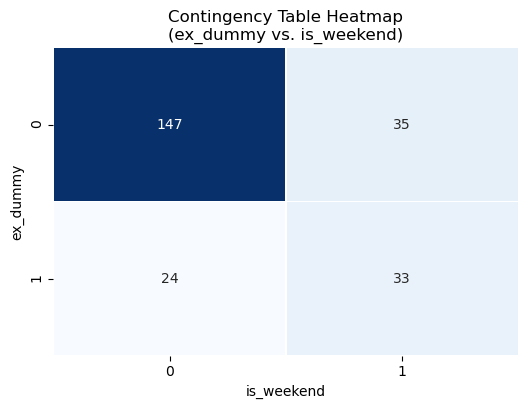

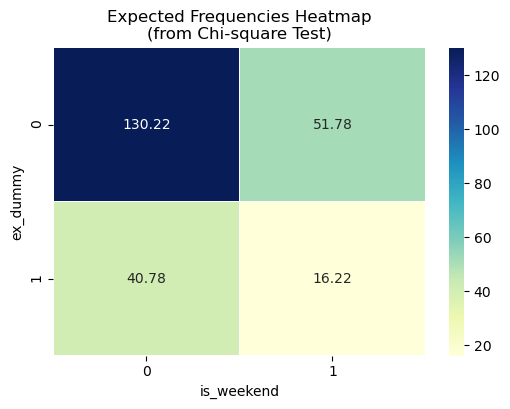

Chi-square p-value: 4.3113222819637375e-08
Chi-square statistic: 30.004106875425308


In [7]:
# Visualizing contigency tables and computing Chi-Sq to see statistical dependency

# Create a contingency table
contingency_table = pd.crosstab(df["ex_dummy"], df["is_weekend"])

# Plotting the heatmap of the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False, linewidths=0.5)
plt.title("Contingency Table Heatmap\n(ex_dummy vs. is_weekend)")
plt.xlabel("is_weekend")
plt.ylabel("ex_dummy")
plt.show()

# Perform Chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Plotting the heatmap for expected frequencies (from Chi-square test)
plt.figure(figsize=(6, 4))
sns.heatmap(expected, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Expected Frequencies Heatmap\n(from Chi-square Test)")
plt.xlabel("is_weekend")
plt.ylabel("ex_dummy")
plt.show()

# Printing the p-value for the Chi-square test
print(f"Chi-square p-value: {p}")
print(f"Chi-square statistic: {chi2}")

Interpretation:
p-value < 0.05, so we reject the null hypothesis that the two variables are independent.

This suggests that there is a statistically significant relationship between the two. In other words, the likelihood of ex_dummy or not appears to be related to whether it's a weekend or not.

And since chi sq statistic is farther away from zero the relation is on the stronger side.

Chi sq test only tells of the presence of a causal relationship and not the direction!

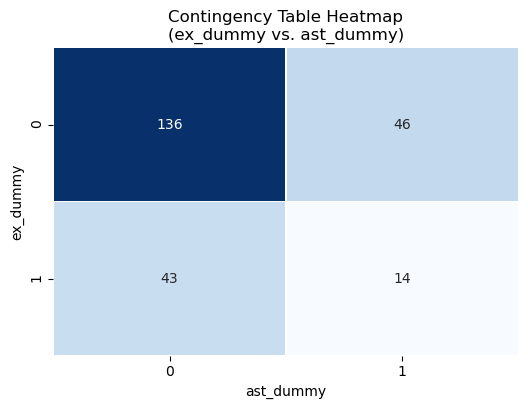

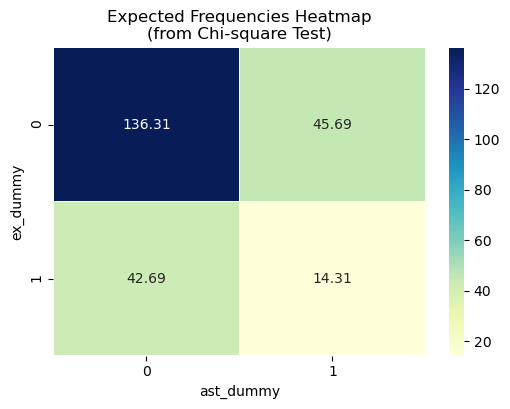

Chi-square p-value: 1.0
Chi-square statistic: 0.0


In [8]:
# Create a contingency table
contingency_table = pd.crosstab(df["ex_dummy"], df["ast_dummy"])

# Plotting the heatmap of the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False, linewidths=0.5)
plt.title("Contingency Table Heatmap\n(ex_dummy vs. ast_dummy)")
plt.xlabel("ast_dummy")
plt.ylabel("ex_dummy")
plt.show()

# Perform Chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Plotting the heatmap for expected frequencies (from Chi-square test)
plt.figure(figsize=(6, 4))
sns.heatmap(expected, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Expected Frequencies Heatmap\n(from Chi-square Test)")
plt.xlabel("ast_dummy")
plt.ylabel("ex_dummy")
plt.show()

# Printing the p-value for the Chi-square test
print(f"Chi-square p-value: {p}")
print(f"Chi-square statistic: {chi2}")

Interpretation of the Chi-Square p-value (0.947):
p-value > 0.05 indicates that the null hypothesis cannot be rejected.

Null Hypothesis: The two variables are independent of each other.

Conclusion: There is no statistically significant relationship between the two. In other words, whether it there was ast_dummy or not, does not influence whether there was a ex_dummy or not, based on this dataset.

# Causal Discovery

Chi Sq Expected values are above 5, this implies that underrepresentation of categorical variables (like ov_window == 1 only 40 times) might not be a concern. Keep in mind:

1. reweighting during testing
2. model robustness test
3. undesampling data/ regularization of data / cross-validation / boot-strapping

Later if temporal dependencies are of interest try lagging the variables and then running the algorithms

Create lagged variables (e.g., previous day's weight)
df['prev_weight'] = df['weight'].shift(1)

Drop the first row (since it has a NaN value for 'prev_weight')
df = df.dropna()

Now you can use this lagged data in causal discovery

In [20]:
# 1. Check for Categorical vs continous vars - data is mostly categorical
# 2. Check for linear relationships - variables seem non linearly related
# 3. Check for Gaussian distribution - not relevant for categorical variables
# 4. Check for conditional independence - mostly independent

In [4]:
# Set 'date' as the index
df.set_index('date', inplace=True)

In [9]:
# Check normality for each variable
for col in df.columns:
    stat, p = stats.shapiro(df[col])
    print(f"{col}: p-value = {p}")

# If p-value < 0.05, data is NOT Gaussian (Good for LiNGAM)

ov_window: p-value = 1.614825081932237e-26
ex_dummy: p-value = 6.782831659963683e-25
is_weekend: p-value = 4.68285267165198e-24
ast_dummy: p-value = 1.1916026977213131e-24


In [23]:
# PC Algorithm or GES fit the best according to ChatGPT

## 1. PC Algorithm (Peter-Clark Algorithm)
The PC Algorithm is a constraint-based method that starts by assuming the variables are fully connected and then removes edges based on conditional independence tests. It searches for a graph that best represents conditional independencies.

In [2]:
!pip install scipy==1.10.1
!pip install pgmpy==0.1.19
!pip install causalnex==0.12.1

In [8]:
!where python

C:\Users\1412r\anaconda3\envs\causal_analysis_env\python.exe
C:\Users\1412r\anaconda3\python.exe
C:\Users\1412r\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\1412r\AppData\Local\Microsoft\WindowsApps\python.exe


In [25]:
pip install scipy==1.10.1

Note: you may need to restart the kernel to use updated packages.


C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\pgmpy\estimators\CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\pgmpy\estimators\CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sil

StopIteration: 

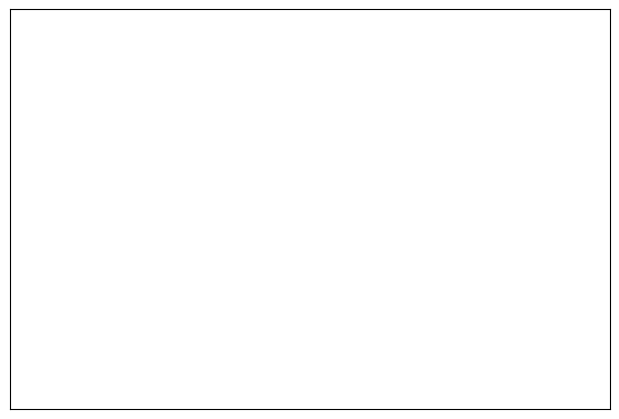

In [5]:
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Convert categorical variables to type 'category'
for col in df.columns:
    df[col] = df[col].astype("category")

# Apply the PC Algorithm
pc = PC(data=df)
dag = pc.estimate(return_type="dag")  # Returns a Directed Acyclic Graph

# Visualize the learned structure
plt.figure(figsize=(6, 4))
nx.draw(dag, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.title("Causal Structure Learned by PC Algorithm")
plt.show()

# Print the learned edges
print("Edges in the learned causal graph:", dag.edges())


In [6]:
pip install causallearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement causallearn (from versions: none)
ERROR: No matching distribution found for causallearn


In [5]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
import pandas as pd

# Convert categorical variables to numerical (PC algorithm requires numerical input)
data_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Run PC Algorithm with default parameters
cg = pc(data_encoded)

# Or customize parameters
cg = pc(
    data_encoded, 
    alpha=0.05,  # Significance level for independence tests
    indep_test="chisq",  # Chi-square test for categorical data
    stable=True, 
    uc_rule=0, 
    uc_priority=0, 
    mvpc=False, 
    correction_name=None, 
    background_knowledge=None, 
    verbose=True, 
    show_progress=True
)

# Visualization using pydot
cg.draw_pydot_graph()

# Save graph as image
pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png("causal_graph.png")


ModuleNotFoundError: No module named 'causallearn'

C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\pgmpy\estimators\CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\pgmpy\estimators\CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\pgmpy\estimators\CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to

Learned Causal Graph Edges: [('is_weekend', 'ex_dummy')]


StopIteration: 

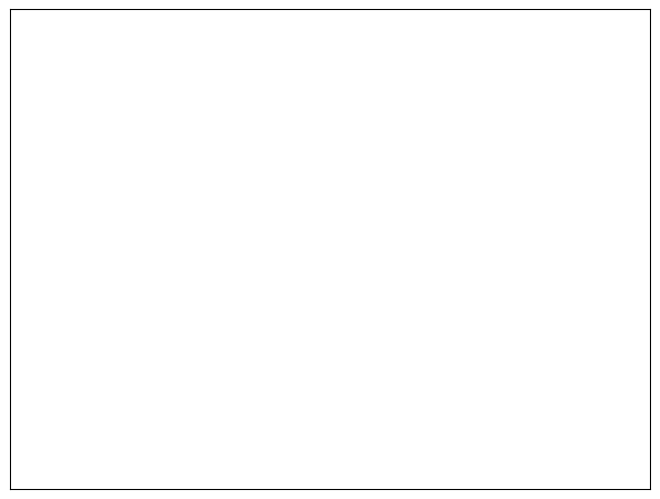

In [7]:
from pgmpy.estimators import PC

# Create a PC algorithm instance
pc = PC(data=df)

# Learn the causal structure
model = pc.estimate(return_type="dag")

# Print edges in the DAG
print("Learned Causal Graph Edges:", model.edges())

# If you want to visualize the graph (optional)
import networkx as nx
nx.draw(model, with_labels=True)
plt.show()

In [13]:
pip show pgmpy

Name: pgmpy
Version: 0.1.19
Summary: A library for Probabilistic Graphical Models
Home-page: https://github.com/pgmpy/pgmpy
Author: Ankur Ankan
Author-email: ankurankan@gmail.com
License: MIT
Location: c:\users\1412r\anaconda3\lib\site-packages
Requires: joblib, tqdm, statsmodels, pyparsing, torch, scikit-learn, pandas, scipy, numpy, networkx
Required-by: causalnex
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Create an empty structure model

from causalnex.structure import StructureModel
sm = StructureModel()

In [12]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(df)

In [13]:
from causalnex.plots import plot_structure

_, _, _ = plot_structure(sm)

TypeError: cannot unpack non-iterable Network object

In [14]:
sm.remove_edges_below_threshold(0.8)
_, _, _ = plot_structure(sm)

TypeError: cannot unpack non-iterable Network object

## Greedy Equivalence Search (GES)
The GES method is a score-based search method that uses maximum likelihood to find the most probable causal graph structure.

We can use pgmpy for implementing GES, which is a great library for probabilistic graphical models in Python.Uses score-based search methods to identify causal relationships.

In [11]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pgmpy.models import DAG
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import GreedySearch, MaximumLikelihoodEstimator

# Initialize the model
model = DAG()

# Apply Greedy Equivalence Search
ges = GreedySearch()
ges.fit(df)
model = ges.estimate()

# Visualize the learned graph
model.plot()


ImportError: cannot import name 'DAG' from 'pgmpy.models' (C:\Users\1412r\anaconda3\envs\causal_analysis_env\lib\site-packages\pgmpy\models\__init__.py)

In [7]:
import scipy
import pgmpy
import causalnex

print("Scipy version:", scipy.__version__)
print("Pgmpy version:", pgmpy.__version__)
print("Causalnex version:", causalnex.__version__)

Scipy version: 1.10.1
Pgmpy version: 0.1.19
Causalnex version: 0.12.1


In [9]:
!pip install --force-reinstall pandas==1.0

     ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.8 MB ? eta -:--:--
     ------ --------------------------------- 0.8/4.8 MB 2.2 MB/s eta 0:00:02
     ---------- ----------------------------- 1.3/4.8 MB 2.5 MB/s eta 0:00:02
     ----------------- ---------------------- 2.1/4.8 MB 2.6 MB/s eta 0:00:02
     --------------------- ------------------ 2.6/4.8 MB 2.6 MB/s eta 0:00:01
     ------------------------- -------------- 3.1/4.8 MB 2.6 MB/s eta 0:00:01
     ---------------------------- ----------- 3.4/4.8 MB 2.5 MB/s eta 0:00:01
     -------------------------------- ------- 3.9/4.8 MB 2.4 MB/s eta 0:00:01
     ---------------------------------- ----- 4.2/4.8 MB 2.4 MB/s eta 0:00:01
     ------------------------------------ --- 4.5/4.8 MB 2.2 MB/s eta 0:00:01
     -------------------------------------- - 4.7/4.8 MB 2.0 MB/s eta 0:00:01
     -------------------------------------- - 4.7/4.8 MB 2.0 MB/s eta 0:00:01


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [91 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.7" and platform_system == "AIX"' don't match your environment
    Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
    Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
       ---------------------------------------- 0.0/4.9 MB ? eta -:--:--
       ---------------------------------------- 0.0/4.9 MB ? eta -:--:--
       ---- ----------------------------------- 0.5/4.9 MB 1.7 MB/s eta 0:00:03
       -------- ------------------------------- 1.0/4.9 MB 2.5 MB/s eta 0:00:02
       -------------- ------------------------- 1.8/4.9 MB 2.6 MB/s eta 0:

In [8]:
pip install --upgrade pandas

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
causalnex 0.12.1 requires pandas<2.0,>=1.0, but you have pandas 2.2.3 which is incompatible.
